In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from tensorflow import keras

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
directory = 'modified_data/'

eeg_data = []
labels = []
for filename in os.scandir(directory):
    data = pd.read_csv(filename.path)
    if (data["label"][0] == 'Like'):
        labels.append(0)
    else:
        labels.append(1)
    eeg_data.append(data.drop(['label'] , axis = 1))
    

In [4]:
labels = np.array(labels)
eeg_data = np.array(eeg_data)

In [7]:
test_data = eeg_data[:83]
test_label = labels[:83]

eeg_data = eeg_data[83:]
labels = labels[83:]

In [8]:
eeg_data.shape

(962, 512, 14)

In [10]:
# Set input shape for CNN
def init_model(): 
    input_shape = (512,14,1)

    # Define CNN model architecture
    model = Sequential()

    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu' , input_shape = input_shape))
    model.add(layers.BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(0.3))
    model.add(Flatten())

    model.add(Dense(164, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(2, activation='softmax'))
    
    #compile model
    model.compile(keras.optimizers.Adam(learning_rate = 0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    #return model
    return model

In [12]:
kfold = StratifiedKFold(n_splits=5, shuffle=False)
k_fold = list(kfold.split(eeg_data , labels))


In [13]:
folds = []

In [14]:
testing_scores = []
training_score = []
for train_indices, test_indices in k_fold:
    
    X_train, X_test = eeg_data[train_indices], eeg_data[test_indices]
    y_train, y_test = labels[train_indices], labels[test_indices]
    
#     train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
#     test_0, test_1 = len(y_val[y_val==0]), len(y_val[y_val==1])
#     print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
    
    model = init_model()
    # Train the model on the training data for this fold
    history = model.fit(X_train, y_train, epochs = 200 , batch_size = 16)
    
    training_score.append(history.history['accuracy'][-1] * 100)
    folds.append(history)
    
    # Evaluate the model on the validation data for this fold
    score = model.evaluate(X_test, y_test)
    testing_scores.append(score[1] * 100)


Epoch 1/200
49/49 [==============================] - 4s 59ms/step - loss: 1.2431 - accuracy: 0.5527
Epoch 2/200
49/49 [==============================] - 3s 60ms/step - loss: 0.6460 - accuracy: 0.7022
Epoch 3/200
49/49 [==============================] - 3s 59ms/step - loss: 0.4587 - accuracy: 0.7776
Epoch 4/200
49/49 [==============================] - 3s 60ms/step - loss: 0.3462 - accuracy: 0.8296
Epoch 5/200
49/49 [==============================] - 3s 59ms/step - loss: 0.2942 - accuracy: 0.8648
Epoch 6/200
49/49 [==============================] - 3s 60ms/step - loss: 0.2476 - accuracy: 0.9012
Epoch 7/200
49/49 [==============================] - 3s 60ms/step - loss: 0.1936 - accuracy: 0.9311
Epoch 8/200
49/49 [==============================] - 3s 61ms/step - loss: 0.1764 - accuracy: 0.9389
Epoch 9/200
49/49 [==============================] - 3s 61ms/step - loss: 0.1320 - accuracy: 0.9597
Epoch 10/200
49/49 [==============================] - 3s 60ms/step - loss: 0.1080 - accuracy: 0.9662

49/49 [==============================] - 3s 59ms/step - loss: 9.8999e-04 - accuracy: 1.0000
Epoch 163/200
49/49 [==============================] - 3s 59ms/step - loss: 4.4539e-04 - accuracy: 1.0000
Epoch 164/200
49/49 [==============================] - 3s 59ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 165/200
49/49 [==============================] - 3s 59ms/step - loss: 2.9690e-04 - accuracy: 1.0000
Epoch 166/200
49/49 [==============================] - 3s 59ms/step - loss: 4.6158e-04 - accuracy: 1.0000
Epoch 167/200
49/49 [==============================] - 3s 61ms/step - loss: 0.0022 - accuracy: 0.9987
Epoch 168/200
49/49 [==============================] - 3s 61ms/step - loss: 5.8101e-04 - accuracy: 1.0000
Epoch 169/200
49/49 [==============================] - 3s 61ms/step - loss: 5.4718e-04 - accuracy: 1.0000
Epoch 170/200
49/49 [==============================] - 3s 60ms/step - loss: 4.7324e-04 - accuracy: 1.0000
Epoch 171/200
49/49 [==============================] - 3s 61ms/step 

49/49 [==============================] - 3s 60ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 122/200
49/49 [==============================] - 3s 59ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 123/200
49/49 [==============================] - 3s 59ms/step - loss: 0.0062 - accuracy: 0.9974
Epoch 124/200
49/49 [==============================] - 3s 59ms/step - loss: 0.0016 - accuracy: 0.9987
Epoch 125/200
49/49 [==============================] - 3s 60ms/step - loss: 5.2063e-04 - accuracy: 1.0000
Epoch 126/200
49/49 [==============================] - 3s 59ms/step - loss: 6.5649e-04 - accuracy: 1.0000
Epoch 127/200
49/49 [==============================] - 3s 59ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 128/200
49/49 [==============================] - 3s 60ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 129/200
49/49 [==============================] - 3s 62ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 130/200
49/49 [==============================] - 3s 61ms/step - loss: 0.0028 - acc

49/49 [==============================] - 3s 59ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 81/200
49/49 [==============================] - 3s 61ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 82/200
49/49 [==============================] - 3s 61ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 83/200
49/49 [==============================] - 3s 59ms/step - loss: 0.0054 - accuracy: 0.9987
Epoch 84/200
49/49 [==============================] - 3s 62ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 85/200
49/49 [==============================] - 3s 61ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 86/200
49/49 [==============================] - 3s 60ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 87/200
49/49 [==============================] - 3s 60ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 88/200
49/49 [==============================] - 3s 60ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 89/200
49/49 [==============================] - 3s 60ms/step - loss: 0.0043 - accuracy: 0.9974
Epo

49/49 [==============================] - 3s 62ms/step - loss: 0.0118 - accuracy: 0.9987
Epoch 38/200
49/49 [==============================] - 3s 61ms/step - loss: 0.0083 - accuracy: 0.9974
Epoch 39/200
49/49 [==============================] - 3s 62ms/step - loss: 0.0081 - accuracy: 0.9987
Epoch 40/200
49/49 [==============================] - 3s 59ms/step - loss: 0.0084 - accuracy: 0.9974
Epoch 41/200
49/49 [==============================] - 3s 62ms/step - loss: 0.0118 - accuracy: 0.9974
Epoch 42/200
49/49 [==============================] - 3s 61ms/step - loss: 0.0099 - accuracy: 0.9961
Epoch 43/200
49/49 [==============================] - 3s 59ms/step - loss: 0.0208 - accuracy: 0.9935
Epoch 44/200
49/49 [==============================] - 3s 60ms/step - loss: 0.0176 - accuracy: 0.9961
Epoch 45/200
49/49 [==============================] - 3s 59ms/step - loss: 0.0122 - accuracy: 0.9961
Epoch 46/200
49/49 [==============================] - 3s 59ms/step - loss: 0.0084 - accuracy: 0.9974
Epo

49/49 [==============================] - 3s 61ms/step - loss: 5.1419e-04 - accuracy: 1.0000
Epoch 197/200
49/49 [==============================] - 3s 61ms/step - loss: 2.1584e-04 - accuracy: 1.0000
Epoch 198/200
49/49 [==============================] - 3s 61ms/step - loss: 0.0014 - accuracy: 0.9987
Epoch 199/200
49/49 [==============================] - 3s 61ms/step - loss: 0.0039 - accuracy: 0.9987
Epoch 200/200
6/6 [==============================] - 0s 22ms/step - loss: 1.2526 - accuracy: 0.7396
Epoch 1/200
49/49 [==============================] - 4s 58ms/step - loss: 1.0911 - accuracy: 0.6013
Epoch 2/200
49/49 [==============================] - 3s 57ms/step - loss: 0.6041 - accuracy: 0.7143
Epoch 3/200
49/49 [==============================] - 3s 57ms/step - loss: 0.3716 - accuracy: 0.8312
Epoch 4/200
49/49 [==============================] - 3s 58ms/step - loss: 0.3507 - accuracy: 0.8247
Epoch 5/200
49/49 [==============================] - 3s 58ms/step - loss: 0.2760 - accuracy: 0.883

49/49 [==============================] - 3s 63ms/step - loss: 0.0068 - accuracy: 0.9974
Epoch 157/200
49/49 [==============================] - 3s 61ms/step - loss: 0.0085 - accuracy: 0.9948
Epoch 158/200
49/49 [==============================] - 3s 60ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 159/200
49/49 [==============================] - 3s 60ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 160/200
49/49 [==============================] - 3s 65ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 161/200
49/49 [==============================] - 3s 68ms/step - loss: 0.0017 - accuracy: 0.9987
Epoch 162/200
49/49 [==============================] - 3s 64ms/step - loss: 0.0021 - accuracy: 0.9987
Epoch 163/200
49/49 [==============================] - 3s 65ms/step - loss: 0.0073 - accuracy: 0.9987
Epoch 164/200
49/49 [==============================] - 3s 71ms/step - loss: 0.0029 - accuracy: 0.9987
Epoch 165/200
49/49 [==============================] - 3s 62ms/step - loss: 0.0056 - accuracy: 0

In [17]:
testing_scores

[70.46632170677185,
 70.98445892333984,
 75.52083134651184,
 73.95833134651184,
 70.3125]

In [18]:
training_score 

[100.0, 100.0, 100.0, 99.8701274394989, 99.74026083946228]

In [20]:
avg_score = sum(testing_scores) / len(testing_scores)
print('Average testing score:', avg_score)

Average testing score: 72.24848866462708


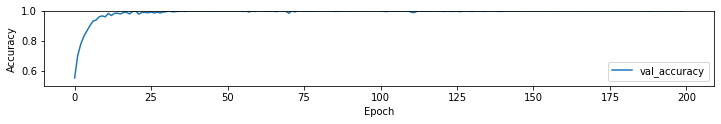

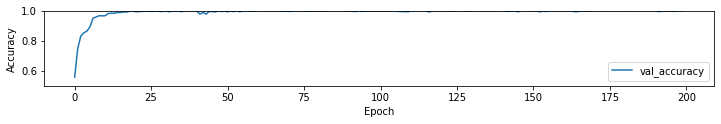

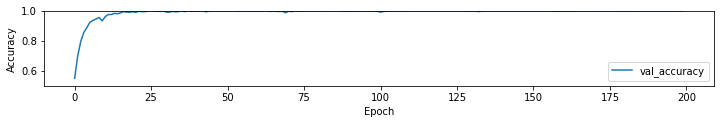

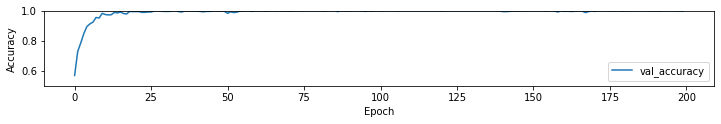

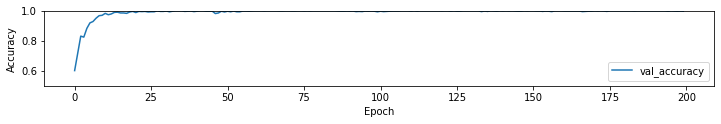

In [21]:
c = 1
co = 0
for i in folds:
    plt.figure(figsize = (12,8))
    plt.subplot(5,1,c)
    plt.plot(i.history['accuracy'], label='val_accuracy')
#     plt.plot(i.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    c+=1
    co+=1

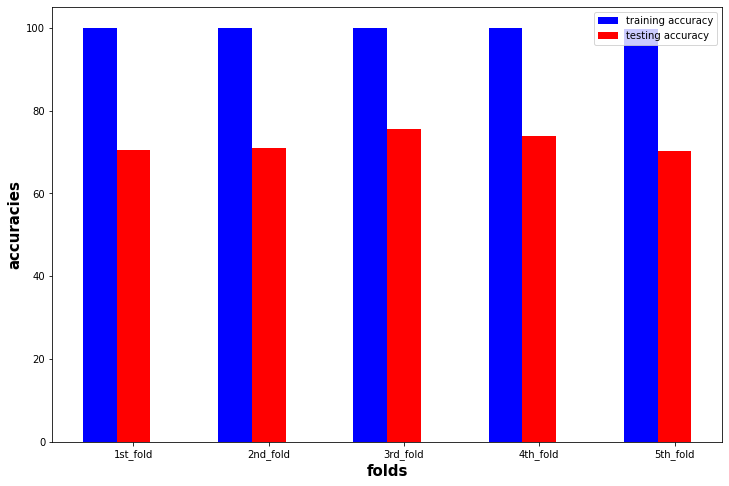

In [23]:
x = ['1st_fold' , '2nd_fold' , '3rd_fold' , '4th_fold' , '5th_fold']
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
br1 = np.arange(len(x))
br2 = [x + barWidth for x in br1]
plt.bar(br1  , training_score , color = "blue" , label = "training accuracy" ,width = barWidth)
plt.bar(br2 , testing_scores , color = "red" , label = "testing accuracy" , width = barWidth)
plt.xlabel('folds', fontweight ='bold', fontsize = 15)
plt.ylabel('accuracies', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(x))],x)
 
plt.legend()
plt.show()

# ensambled the models

In [34]:
y_pred = []
for data in test_data:
    res= []
    for modl in folds:
        res.append(np.argmax(modl.model.predict(np.array([data , ]))))
    print(res)
    
    if res.count(0) > res.count(1):
        y_pred.append(0)
    else:
        y_pred.append(1)
        
           
        

1/1 [==============================] - 0s 16ms/step
[0, 0, 0, 0, 0]
1/1 [==============================] - 0s 21ms/step
[1, 1, 1, 1, 1]
1/1 [==============================] - 0s 17ms/step
[1, 1, 1, 1, 1]
1/1 [==============================] - 0s 25ms/step
[0, 0, 0, 1, 0]
1/1 [==============================] - 0s 17ms/step
[0, 1, 1, 1, 1]
1/1 [==============================] - 0s 17ms/step
[1, 0, 1, 1, 1]
1/1 [==============================] - 0s 24ms/step
[1, 1, 1, 1, 1]
1/1 [==============================] - 0s 22ms/step
[1, 1, 1, 1, 1]
1/1 [==============================] - 0s 22ms/step
[0, 1, 0, 1, 1]
1/1 [==============================] - 0s 17ms/step
[0, 0, 0, 0, 0]
1/1 [==============================] - 0s 17ms/step
[1, 1, 1, 1, 1]
1/1 [==============================] - 0s 25ms/step
[0, 1, 0, 0, 0]
1/1 [==============================] - 0s 25ms/step
[1, 0, 0, 1, 1]
1/1 [==============================] - 0s 18ms/step
[0, 0, 0, 0, 0]
1/1 [==============================] - 0s 27ms/s

1/1 [==============================] - 0s 17ms/step
[1, 1, 1, 1, 1]
1/1 [==============================] - 0s 24ms/step
[0, 0, 1, 0, 0]
1/1 [==============================] - 0s 17ms/step
[0, 0, 1, 1, 0]
1/1 [==============================] - 0s 22ms/step
[1, 1, 1, 1, 1]
1/1 [==============================] - 0s 30ms/step
[1, 1, 1, 1, 1]
1/1 [==============================] - 0s 30ms/step
[1, 1, 1, 1, 1]
1/1 [==============================] - 0s 23ms/step
[1, 1, 1, 1, 1]
1/1 [==============================] - 0s 17ms/step
[0, 0, 1, 0, 0]
1/1 [==============================] - 0s 25ms/step
[1, 0, 1, 1, 1]
1/1 [==============================] - 0s 16ms/step
[1, 1, 1, 1, 1]
1/1 [==============================] - 0s 20ms/step
[1, 1, 1, 1, 1]
1/1 [==============================] - 0s 27ms/step
[1, 1, 1, 1, 1]
1/1 [==============================] - 0s 15ms/step
[1, 1, 1, 1, 1]
1/1 [==============================] - 0s 17ms/step
[0, 1, 1, 1, 1]
1/1 [==============================] - 0s 27ms/s

# Evaluate ensambeled Model

In [36]:
import seaborn as sns
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt

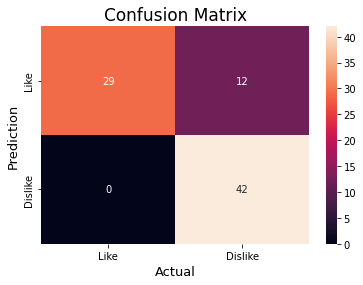

In [37]:
cm = confusion_matrix(test_label,y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Like','Dislike'],
            yticklabels=['Like','Dislike'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [40]:
accuaracy = (cm[0][0] + cm[1][1]) / test_data.shape[0] *100
recall = (cm[0][0]) /(cm[0][0] + cm[1][0]) *100
precision = (cm[0][0]) /(cm[0][0] + cm[0][1]) *100
f1_score = (2*recall*precision)/(recall + precision)

In [41]:
print('Accuracy: ' , accuaracy)
print('Precision: ' , precision)
print('Recall: ' , recall)
print('F1 SCore: ' , f1_score)

Accuracy:  85.54216867469879
Precision:  70.73170731707317
Recall:  100.0
F1 SCore:  82.85714285714285


# save the models

In [57]:
num_fold = 1
for i in folds:
    i.model.save(f'models/modified-data-5Fold-5Model/fold_{num_fold}')
    num_fold+=1

INFO:tensorflow:Assets written to: models/modified-data-5Fold-5Model/fold_1\assets


INFO:tensorflow:Assets written to: models/modified-data-5Fold-5Model/fold_1\assets


INFO:tensorflow:Assets written to: models/modified-data-5Fold-5Model/fold_2\assets


INFO:tensorflow:Assets written to: models/modified-data-5Fold-5Model/fold_2\assets


INFO:tensorflow:Assets written to: models/modified-data-5Fold-5Model/fold_3\assets


INFO:tensorflow:Assets written to: models/modified-data-5Fold-5Model/fold_3\assets


INFO:tensorflow:Assets written to: models/modified-data-5Fold-5Model/fold_4\assets


INFO:tensorflow:Assets written to: models/modified-data-5Fold-5Model/fold_4\assets


INFO:tensorflow:Assets written to: models/modified-data-5Fold-5Model/fold_5\assets


INFO:tensorflow:Assets written to: models/modified-data-5Fold-5Model/fold_5\assets
